# Исследование надежности заемщиков

## Откроем таблицу и изучим общую информацию о данных

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраните в переменную `data`**

In [5]:
import pandas as pd

data = pd.read_csv('data.csv')

In [6]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Выведем основную информацию о датафрейме с помощью метода info().**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Выведем количество пропущенных значений для каждого столбца**

In [8]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**В двух столбцах есть пропущенные значения. Один из них — `days_employed` (стаж). Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type` (тип занятости).**

In [9]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Устраним отрицательное количество дней трудового стажа в столбце `days_employed`**

In [10]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости рассмотрим медианное значение трудового стажа days_employed в днях**

In [11]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть

**Рассмотрим перечень уникальных значений столбца `children`.**

In [12]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма.**

In [13]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Заполним пропуски в столбце `days_employed` медианными значениями каждого типа занятости `income_type`.**

In [14]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Проверим все пропуски**

In [15]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Заменим вещественный тип данных в столбце total_income на целочисленный**

In [17]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [18]:
data.duplicated().sum()

54

In [19]:
data = data.drop_duplicates()

**Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру**

In [20]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [21]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [22]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [23]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [24]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [25]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуем данные

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

**Получим список возможного количества детей**

In [26]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [27]:
display(data.head(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


**Составим список из количества должников по кредиту (в процентах) в каждой категории количества детей**

In [28]:
risk_child = [] 
# С помощью цикла посчитаем количество дожников (в процентном содержании) при каждом количестве детей:
for i in range(len(data['children'].value_counts())):
    
    # Получим таблицу, демонстрирующую "должников", у которых i детей:
    amount_child_dept = data.loc[(data['children'] == i) & (data['debt'] == 1)]
    
    # Посчитаем количество таких людей:
    amount_child_dept = amount_child_dept['debt'].sum()

    # Посчитаем общее число людей с i детьми:
    amount_child_people = data.loc[(data['children'] == i)].count()
    amount_child_people = amount_child_people['children'].sum()

    # Получим процент должников среди людей с i детьми:
    risk_child.append(amount_child_dept / amount_child_people * 100)
print(risk_child)

[7.535266179910682, 9.23268870867124, 9.4541910331384, 8.181818181818182, 9.75609756097561, 0.0]


**По полученным данным составим столбчатую диаграмму (по оx: количество детей, по oy: процент должников):**

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

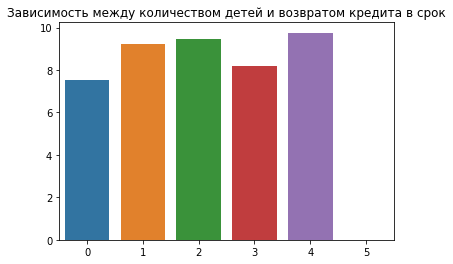

In [29]:
import seaborn as sb
# Так как в столбце children количество детей варьируется от 0 до 5, то по ox возьмем значения 0:5
amount_children = [0,1,2,3,4,5]
result_children = sb.barplot(x = amount_children, y = risk_child)
result_children.set_title('Зависимость между количеством детей и возвратом кредита в срок')
result_children.set_xticklabels(result_children.get_xticklabels())

<font color='blue'>**Второй способ решения**</font>

,debt
children,
0,7.535266
1,9.232689
2,9.454191
3,8.181818
4,9.756098
5,0.000000


,Процент ненадежных заемщиков,Количество детей
children,,
0,7.535266,1
1,9.232689,0
2,9.454191,3
3,8.181818,2
4,9.756098,4
5,0.000000,5


Text(0.5, 1.0, 'Зависимость между количеством детей и возвратом кредита в срок')

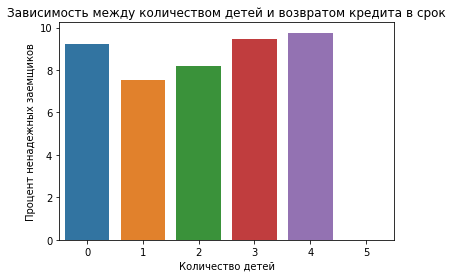

In [30]:
# С помощью сводной таблицы и метода pivot_table
data_pivot_children = data.pivot_table(index = ['children'], values = 'debt', aggfunc = 'mean')
data_pivot_children['debt'] = data_pivot_children['debt'] * 100
display(data_pivot_children)

# Построение графика
# Создание таблицы, по которой будет строиться график
result_children_second = pd.DataFrame({'Процент ненадежных заемщиков': data_pivot_children['debt'], 'Количество детей': data['children'].unique()})
display(result_children_second)

# Вывод и оформление графика
result_children_second = sb.barplot(x = 'Количество детей', y = 'Процент ненадежных заемщиков', data = result_children_second)
result_children_second.set_title('Зависимость между количеством детей и возвратом кредита в срок')

**Вывод: В соответствии с диаграммой можно сделать вывод, что количество детей незначительно влияет на возврат кредита в срок.
Однако, стоит заметить, что, в целом, тенденция количества должников возрастает с увеличением числа детей.
Самой "опасной" категорией являются люди, имеющие 4-ех детей. Самой "безопасной" - не имеющие детей. Людей, имеющих пятерых детей, слишком мало и, в соответствии с данными, никто из них не имеет просрочек, поэтому данный столбец показательным не является.** 

**Таким образом, можно составить список категорий населения по количеству детей по убыванию риска:**
- 4 ребенка - самая рискованная категория
- 2 ребенка
- 1 ребенок
- 3 ребенка
- нет детей - наименее рискованная категория

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

**Просмотрим уникальные значения в стобце family_status и family_status_id**

In [31]:
display(data['family_status'].unique())
display(data['family_status_id'].unique())

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

array([0, 1, 2, 3, 4])

**Каждому значению столбца family_status_id соответствует одно из семейных положений (соответственно)**

In [32]:
risk_family = [] 
# С помощью цикла посчитаем количество дожников (в процентном содержании) при каждом статусе семейного положения:
for i in range(len(data['family_status_id'].value_counts())):
    
    # Получим таблицу, демонстрирующую "должников" с i - ым id семейного положения:
    amount_family_dept = data.loc[(data['family_status_id'] == i) & (data['debt'] == 1)]
    
    # Посчитаем количество таких людей:
    amount_family_dept = amount_family_dept['debt'].sum()

    # Посчитаем общее число людей с i - ым статусом СП:
    amount_family_people = data.loc[(data['family_status_id'] == i)].count()
    amount_family_people = amount_family_people['family_status_id'].sum()

    # Получим процент должников среди людей с i - ым статусом СП:
    risk_family.append(amount_family_dept / amount_family_people * 100)
print(risk_family)

[7.55747594977988, 9.286058851905452, 6.624605678233439, 7.064760302775442, 9.763948497854077]


**По полученным данным составим столбчатую диаграмму**

**Статусы СП:**
- 0 - женат/замужем,
- 1 - гражданский брак,
- 2 - вдовец/вдова,
- 3 - в разводе,
- 4 - не женат/не замужем.
(по оx: статус СП, по oy: процент должников):

[Text(0, 0, 'женат/замужем'),
 Text(0, 0, 'гражданский брак'),
 Text(0, 0, 'вдовец/вдова'),
 Text(0, 0, 'в разводе'),
 Text(0, 0, 'не женат/не замужем')]

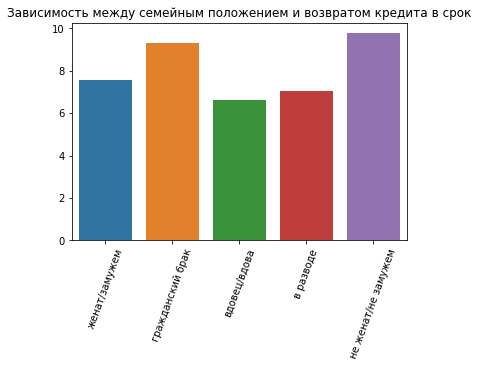

In [33]:
# Так как в столбце family_status_id количество статусов варьируется от 0 до 4, то по ox возьмем значения 0:4
amount_family_status = ['женат/замужем','гражданский брак','вдовец/вдова','в разводе','не женат/не замужем']
result_family = sb.barplot(x = amount_family_status, y = risk_family)
result_family.set_title('Зависимость между семейным положением и возвратом кредита в срок')
result_family.set_xticklabels(result_family.get_xticklabels(), rotation = 70)

<font color='blue'>**Второй способ решения**</font>

,debt
family_status,
Не женат / не замужем,9.763948
в разводе,7.064760
вдовец / вдова,6.624606
гражданский брак,9.286059
женат / замужем,7.557476


,Процент ненадежных заемщиков,Статус семейного положения
family_status,,
Не женат / не замужем,9.763948,женат / замужем
в разводе,7.064760,гражданский брак
вдовец / вдова,6.624606,вдовец / вдова
гражданский брак,9.286059,в разводе
женат / замужем,7.557476,Не женат / не замужем


[Text(0, 0, 'женат / замужем'),
 Text(0, 0, 'гражданский брак'),
 Text(0, 0, 'вдовец / вдова'),
 Text(0, 0, 'в разводе'),
 Text(0, 0, 'Не женат / не замужем')]

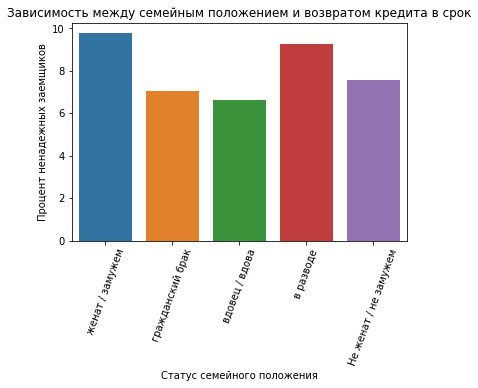

In [34]:
# С помощью сводной таблицы и метода pivot_table
data_pivot_family = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = 'mean')
data_pivot_family['debt'] = data_pivot_family['debt'] * 100
display(data_pivot_family)

# Построение графика
# Создание таблицы, по которой будет строиться график
result_family_second = pd.DataFrame({'Процент ненадежных заемщиков': data_pivot_family['debt'], 'Статус семейного положения': data['family_status'].unique()})
display(result_family_second)

# Вывод и оформление графика
result_family_second = sb.barplot(x = 'Статус семейного положения', y = 'Процент ненадежных заемщиков', data = result_family_second)
result_family_second.set_title('Зависимость между семейным положением и возвратом кредита в срок')
result_family_second.set_xticklabels(result_family_second.get_xticklabels(), rotation = 70)

**Вывод: В соответствии с диаграммой можно сделать вывод, что самой рискованной категорией населения по статусу семейного положения являются неженатые/незамужние люди(столбец 4). Самой безопасной категорией являются вдовцы/вдовы (столбец 2). В целом же сильно по количеству должников выбиваются в "антилидеры" категории людей в гражданском браке(столбец 1) и незамужних/неженатых людей.**

**Таким образом, можно составить список категорий населения по статусу СП по убыванию риска:**
- 4 (неженатые/незамужние люди) - самая рискованная категория
- 1 (гражданский брак)
- 0 (женат/замужем)
- 3 (в разводе)
- 2 (вдовцы/вдовы) - наименее рискованная категория

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

**Ранее мы разбивали доход людей по категориям от A до E и заносили их в столбец total_income_category, поэтому проверять зависимость будем по категориям** 

In [35]:
risk_category = []
array_category = ['A', 'B', 'C', 'D', 'E']
# С помощью цикла посчитаем количество дожников (в процентном содержании) при каждой категории дохода:
for i in array_category:
    
    # Получим таблицу, демонстрирующую "должников" с i - ой категорией дохода:
    amount_category_dept = data.loc[(data['total_income_category'] == i) & (data['debt'] == 1)]
    
    # Посчитаем количество таких людей:
    amount_category_dept = amount_category_dept['debt'].sum()

    # Посчитаем общее число людей с i - ой категорией дохода:
    amount_category_people = data.loc[(data['total_income_category'] == i)].count()
    amount_category_people = amount_category_people['total_income_category'].sum()

    # Получим процент должников среди людей с i - ой категорией дохода:
    risk_category.append(amount_category_dept / amount_category_people * 100)
print(risk_category)

[8.0, 7.060231352213801, 8.489145438574477, 6.017191977077363, 9.090909090909092]


**По полученным данным составим столбчатую диаграмму (по оx: категории дохода, по oy: процент должников)**

**Статусы дохода:**

- A: доход > 1 000 001,
- B: 1 000 000 > доход > 200 001,
- C: 200 000 > доход > 50 001,
- D: 50 000 > доход > 30 001,
- E: 30 000 > доход >= 0.

[Text(0, 0, 'доход > 1 000 001 (A)'),
 Text(0, 0, '1 000 000 > доход > 200 001 (B)'),
 Text(0, 0, '200 000 > доход > 50 001 (C)'),
 Text(0, 0, '50 000 > доход > 30 001 (D)'),
 Text(0, 0, '30 000 > доход >= 0 (E)')]

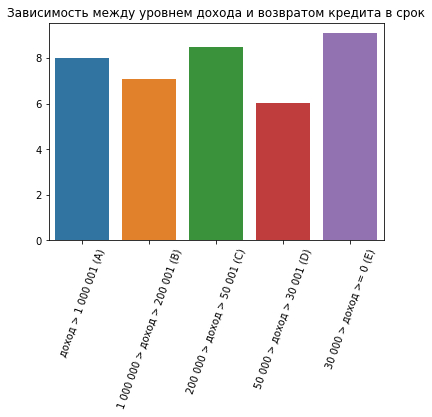

In [36]:
amount_category_status = ['доход > 1 000 001 (A)', '1 000 000 > доход > 200 001 (B)', '200 000 > доход > 50 001 (C)', '50 000 > доход > 30 001 (D)', '30 000 > доход >= 0 (E)']
result_category = sb.barplot(x = amount_category_status, y = risk_category)
result_category.set_title('Зависимость между уровнем дохода и возвратом кредита в срок')
result_category.set_xticklabels(result_category.get_xticklabels(), rotation = 70)

<font color='blue'>**Второй способ решения**</font>

,debt
total_income_category,
A,8.000000
B,7.060231
C,8.489145
D,6.017192
E,9.090909


,Процент ненадежных заемщиков,Уровень дохода
total_income_category,,
A,8.000000,B
B,7.060231,C
C,8.489145,D
D,6.017192,E
E,9.090909,A


Text(0.5, 1.0, 'Зависимость между уровнем дохода и возвратом кредита в срок')

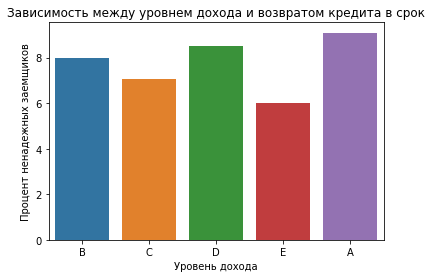

In [37]:
# С помощью сводной таблицы и метода pivot_table
data_pivot_category = data.pivot_table(index = ['total_income_category'], values = 'debt', aggfunc = 'mean')
data_pivot_category['debt'] = data_pivot_category['debt'] * 100
display(data_pivot_category)

# Построение графика
# Создание таблицы, по которой будет строиться график
result_category_second = pd.DataFrame({'Процент ненадежных заемщиков': data_pivot_category['debt'], 'Уровень дохода': data['total_income_category'].unique()})
display(result_category_second)

# Вывод и оформление графика
result_category_second = sb.barplot(x = 'Уровень дохода', y = 'Процент ненадежных заемщиков', data = result_category_second)
result_category_second.set_title('Зависимость между уровнем дохода и возвратом кредита в срок')

**Вывод: В соответствии с полученной диаграммой можно сделать вывод, что самой рискованной категорией населения по уровню дохода являются люди, которые зарабатывают меньше 30 тыс.руб. (столбец E). Самой безопасной категорией населения являются люди, зарабатывающие от 30 тыс. 1 руб. до 50 тыс.руб. (столбец D).**

**Таким образом, можно составить список категорий населения по доходу по убыванию риска:**
- E (30 000 > доход >= 0) - самая рискованная категория
- С (200 000 > доход > 50 001)
- A (доход > 1 000 001)
- B (1 000 000 > доход > 200 001)
- D (50 000 > доход > 30 001) - наименее рискованная категория

**Как разные цели кредита влияют на его возврат в срок?**

**Ранее мы разделили цели кредита на 4 категории:**
- операции с автомобилем
- операции с недвижимостью
- проведение свадьбы
- получение образования

**Найдем процент должников в каждой категории целей кредита**

In [38]:
data['purpose_category']
risk_purpose = []
array_purpose = ['операции с автомобилем', 'операции с недвижимостью', 'проведение свадьбы', 'получение образования']
# С помощью цикла посчитаем количество дожников (в процентном содержании) при каждой цели кредита:
for i in array_purpose:
    
    # Получим таблицу, демонстрирующую "должников" с i - ой целью кредита:
    amount_purpose_dept = data.loc[(data['purpose_category'] == i) & (data['debt'] == 1)]
    
    # Посчитаем количество таких людей:
    amount_purpose_dept = amount_purpose_dept['debt'].sum()

    # Посчитаем общее число людей с i - ой целью кредита:
    amount_purpose_people = data.loc[(data['purpose_category'] == i)].count()
    amount_purpose_people = amount_purpose_people['purpose_category'].sum()

    # Получим процент должников среди людей с i - ой целью кредита:
    risk_purpose.append(amount_purpose_dept / amount_purpose_people * 100)
print(risk_purpose)

[9.343611305769679, 7.253115119955365, 7.874354561101549, 9.250438706442718]


**По полученным данным составим столбчатую диаграмму**

[Text(0, 0, 'операции с автомобилем'),
 Text(0, 0, 'операции с недвижимостью'),
 Text(0, 0, 'проведение свадьбы'),
 Text(0, 0, 'получение образования')]

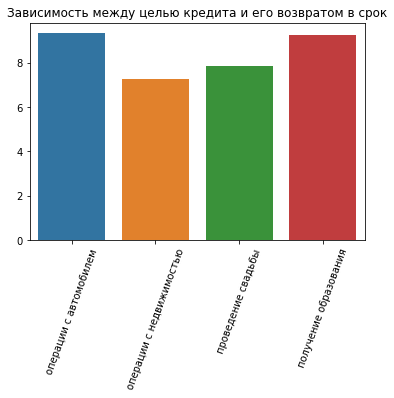

In [39]:
result_purpose = sb.barplot(x = array_purpose, y = risk_purpose)
result_purpose.set_title('Зависимость между целью кредита и его возвратом в срок')
result_purpose.set_xticklabels(result_purpose.get_xticklabels(), rotation = 70)

<font color='blue'>**Второй способ решения**</font>

,debt
purpose_category,
операции с автомобилем,9.343611
операции с недвижимостью,7.253115
получение образования,9.250439
проведение свадьбы,7.874355


,Процент ненадежных заемщиков,Цель кредита
purpose_category,,
операции с автомобилем,9.343611,операции с недвижимостью
операции с недвижимостью,7.253115,операции с автомобилем
получение образования,9.250439,получение образования
проведение свадьбы,7.874355,проведение свадьбы


[Text(0, 0, 'операции с недвижимостью'),
 Text(0, 0, 'операции с автомобилем'),
 Text(0, 0, 'получение образования'),
 Text(0, 0, 'проведение свадьбы')]

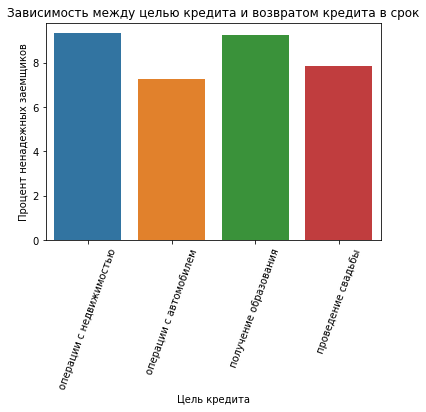

In [40]:
# С помощью сводной таблицы и метода pivot_table
data_pivot_purpose = data.pivot_table(index = ['purpose_category'], values = 'debt', aggfunc = 'mean')
data_pivot_purpose['debt'] = data_pivot_purpose['debt'] * 100
display(data_pivot_purpose)

# Построение графика
# Создание таблицы, по которой будет строиться график
result_purpose_second = pd.DataFrame({'Процент ненадежных заемщиков': data_pivot_purpose['debt'], 'Цель кредита': data['purpose_category'].unique()})
display(result_purpose_second)

# Вывод и оформление графика
result_purpose_second = sb.barplot(x = 'Цель кредита', y = 'Процент ненадежных заемщиков', data = result_purpose_second)
result_purpose_second.set_title('Зависимость между целью кредита и возвратом кредита в срок')
result_purpose_second.set_xticklabels(result_purpose_second.get_xticklabels(), rotation = 70)

**Вывод: В соответствии с полученной диаграммой можно сделать вывод, что самой рискованной категорией населения по цели взятия кредита являются люди, берущие его на операции с автомобилем. Самой безопасной категорией населения являются люди, которые берут кредит на операции с недвижимостью.**

**Таким образом, можно составить список категорий населения по цели взятия кредита по убыванию риска:**
- операции с автомобилем - самая рискованная категория
- получение образования
- проведение свадьбы
- операции с недвижимостью - наименее рискованная категория 

## Общий вывод.

Несмотря на пропуски в значениях, мною был проведен анализ "Исследование надежности заемщиков". Анализ осуществлялся по разным критериям: количество детей, семейное положение, доход и цель кредита. Были получены необходимые зависимости. Процент должников по разным категориям колеблется в среднем от 6 до 10%.

Самыми ненадежными заемщиками является категория незамужних/неженатых людей - процент должников среди них составил 9.76%, причем люди из категории вдовцы/вдовы, либо находящиеся в разводе люди являются, наоборот, самыми надежными заемщиками.
При исследовании рисков по количеству детей была выявлена прямая зависимость по ухудшению надежности при увеличении числа детей заемщика, причем для людей с тремя детьми наблюдается пропуск в тенденции, так как показатель должников в данной категории составил 8.18% (при показателе 9.75% для людей с четыремя детьми и 9.45% с двумя).
При предобработке данных были выявлены пропуски в столбце доходности, поэтому они были заполнены медианным значением для данной категории дохода, что не могло не отразиться на статистике должников. Самыми ненадежными заемщиками оказалась категория людей с доходом меньше 30 000 тыс.руб (9.09%), а самыми надежными же оказались те, чей доход колеблется в пределах от 30 до 50 тыс.руб.(6.01%)
На операции с недвижимостью и проведение свадьбы берут кредит надежные заемщики (7.25% и 7.87% соответственно), тогда как ненадежные берут кредит на получение образования и на операции с автомобилем (9.25% и 9.34% соответственно)